<a href="https://colab.research.google.com/github/jaehakimm/nutrition-data/blob/main/nutrition_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

try:
    df = pd.read_csv('/content/nutrition.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'nutrition.csv' not found. Please ensure the file is in the correct location and accessible.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None

label  weight  calories  protein  carbohydrates  fats  fiber  sugars  \
0  apple_pie      80       240        2             36    10      2      16   
1  apple_pie     100       300        3             45    12      2      20   
2  apple_pie     120       360        4             54    14      3      24   
3  apple_pie     150       450        5             68    18      3      30   
4  apple_pie     200       600        6             90    24      4      40   

   sodium  
0     120  
1     150  
2     180  
3     225  
4     300

In [2]:
print("Shape of the DataFrame:", df.shape)
print("\nData types of each column:\n", df.dtypes)
print("\nDescriptive statistics for numerical columns:\n", df.describe())

Shape of the DataFrame: (505, 9)

Data types of each column:
 label            object
weight            int64
calories          int64
protein           int64
carbohydrates     int64
fats              int64
fiber             int64
sugars            int64
sodium            int64
dtype: object

Descriptive statistics for numerical columns:
            weight     calories     protein  carbohydrates        fats  \
count  505.000000   505.000000  505.000000     505.000000  505.000000   
mean   227.207921   481.380198   21.215842      41.863366   23.689109   
std    102.593000   230.066679   16.294869      30.577431   14.782295   
min     50.000000    50.000000    2.000000       0.000000    1.000000   
25%    150.000000   300.000000    9.000000      18.000000   12.000000   
50%    200.000000   450.000000   16.000000      38.000000   20.000000   
75%    300.000000   600.000000   30.000000      60.000000   30.000000   
max    700.000000  1260.000000   88.000000     150.000000   90.000000   

  

In [3]:
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

missing_values_summary = pd.DataFrame({
    'Column Name': missing_values.index,
    'Number of Missing Values': missing_values.values,
    'Percentage of Missing Values': missing_percentage.values
})

display(missing_values_summary)

Column Name  Number of Missing Values  Percentage of Missing Values
0          label                         0                           0.0
1         weight                         0                           0.0
2       calories                         0                           0.0
3        protein                         0                           0.0
4  carbohydrates                         0                           0.0
5           fats                         0                           0.0
6          fiber                         0                           0.0
7         sugars                         0                           0.0
8         sodium                         0                           0.0

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

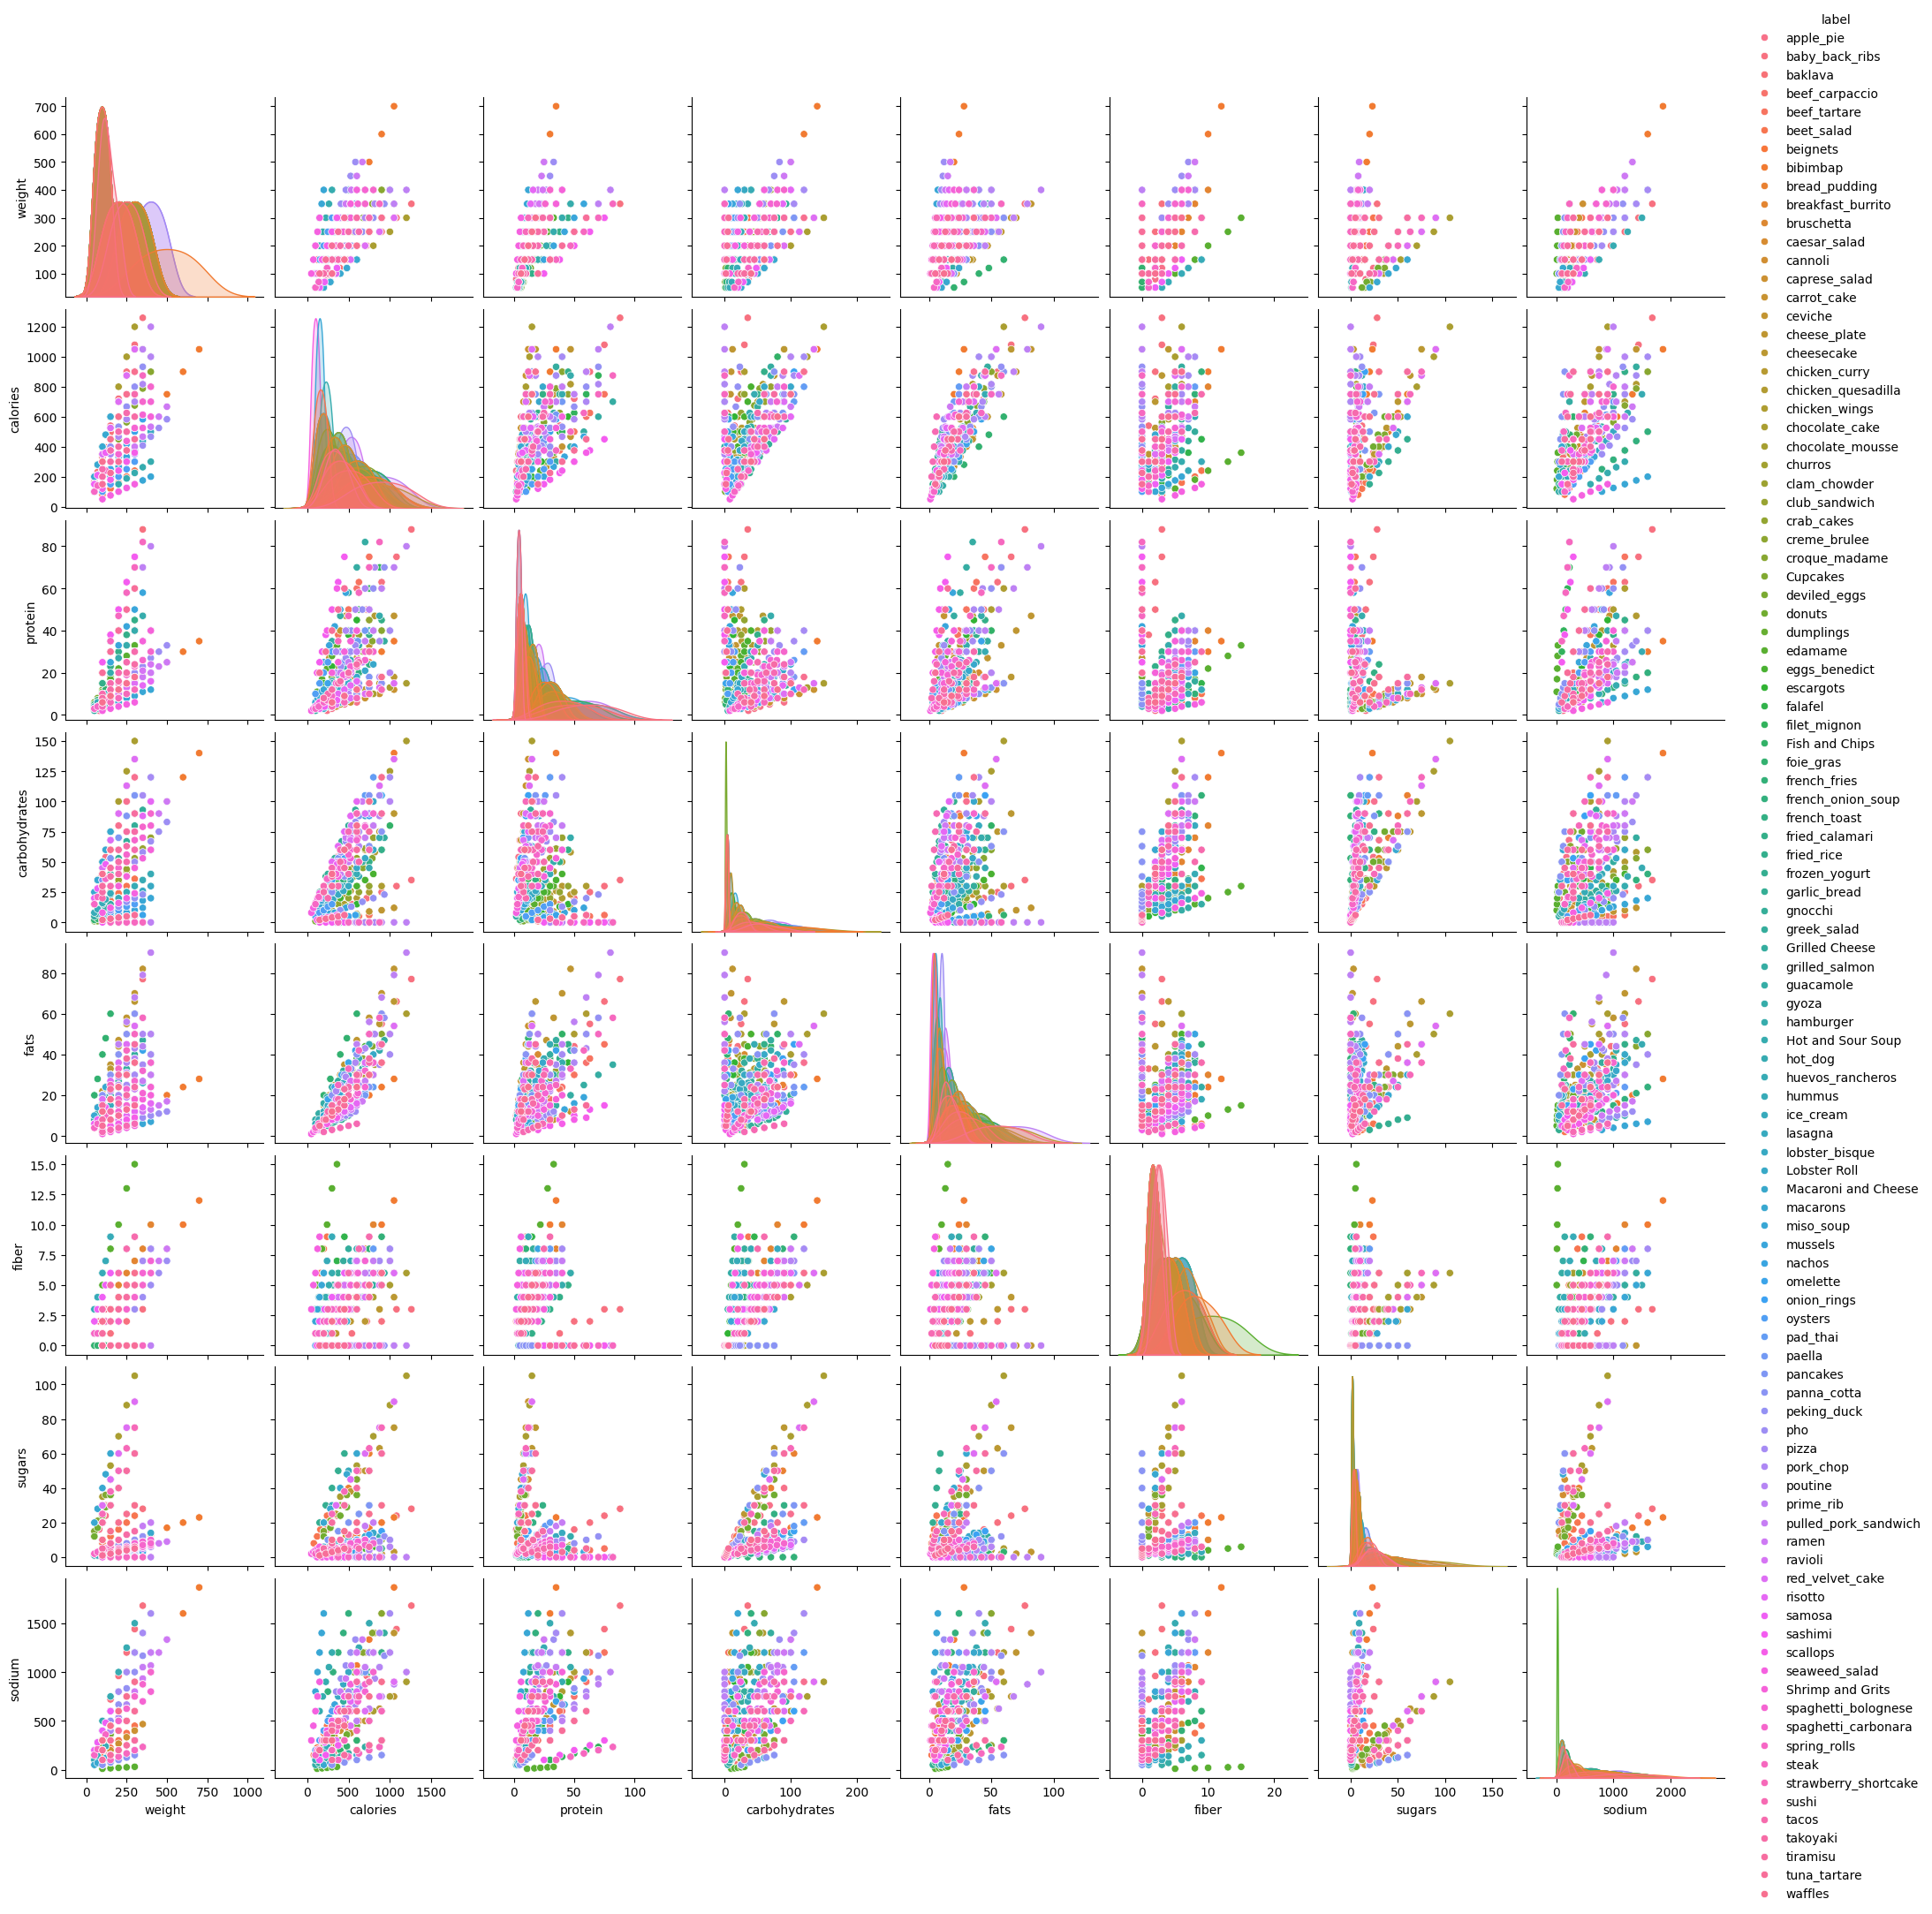

In [5]:
sns.pairplot(data=df, hue="label", )

In [6]:
food_names = df['label'].unique()

for food_name in food_names:
    print(food_name)

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheese_plate
cheesecake
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
Cupcakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
Fish and Chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
Grilled Cheese
grilled_salmon
guacamole
gyoza
hamburger
Hot and Sour Soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
Lobster Roll
Macaroni and Cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
samosa
sashimi
scallo

In [7]:
unique_foods = df['label'].unique()
print("Unique foods:", unique_foods)

def categorize_food_nutrition(food):
    # Normalize the food name: lowercase and replace underscores with spaces
    food_lower = food.lower().replace('_', ' ')

    # Category: Dessert – sweets and desserts
    if any(keyword in food_lower for keyword in [
        'pie', 'cake', 'mousse', 'pudding', 'churro',
        'cannoli', 'cupcake', 'tiramisu', 'cheesecake',
        'baklava', 'macaron', 'shortcake'
    ]):
        return 'Dessert'

    # Category: Soup – if the name indicates a soup or chowder
    elif any(keyword in food_lower for keyword in ['soup', 'bisque', 'chowder']):
        return 'Soup'

    # Category: Salad – if the food name includes "salad"
    elif 'salad' in food_lower:
        return 'Salad'

    # Category: Seafood – common seafood terms
    elif any(keyword in food_lower for keyword in [
        'fish', 'shrimp', 'crab', 'oyster', 'scallop',
        'lobster', 'calamari', 'ceviche', 'sushi', 'sashimi', 'tuna'
    ]):
        return 'Seafood'

    # Category: Meat – meat-based dishes
    elif any(keyword in food_lower for keyword in [
        'beef', 'chicken', 'pork', 'lamb', 'steak',
        'ribs', 'tartare', 'mignon', 'duck', 'chop', 'prime'
    ]):
        return 'Meat'

    # Category: Breakfast – typical breakfast items
    elif any(keyword in food_lower for keyword in [
        'eggs benedict', 'french toast', 'omelette',
        'pancake', 'waffle', 'huevos rancheros', 'burrito'
    ]):
        return 'Breakfast'

    # Category: Carbohydrate – grain, pasta, and rice-based dishes
    elif any(keyword in food_lower for keyword in [
        'bread', 'pasta', 'rice', 'noodle', 'gnocchi',
        'ramen', 'spaghetti', 'lasagna', 'ravioli',
        'paella', 'pizza', 'macaroni', 'bibimbap'
    ]):
        return 'Carbohydrate'

    # Category: Snack/Fast Food – quick bites and fast-food items
    elif any(keyword in food_lower for keyword in [
        'hot dog', 'burger', 'sandwich', 'taco', 'nacho',
        'takoyaki', 'fries', 'onion rings', 'club sandwich'
    ]):
        return 'Snack/Fast Food'

    # If none of the above match, assign to Specialty
    else:
        return 'Specialty'

# Create a new column 'nutrition_category' by applying the categorization function on the 'label' column
df['nutrition_category'] = df['label'].apply(categorize_food_nutrition)

# Display the first few rows to verify the new column
print(df.head())

Unique foods: ['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'Cupcakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'Fish and Chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'Grilled Cheese' 'grilled_salmon' 'guacamole' 'gyoza'
 'hamburger' 'Hot and Sour Soup' 'hot_dog' 'huevos_rancheros' 'hummus'
 'ice_cream' 'lasagna' 'lobster_bisque' 'Lobster Roll'
 'Macaroni and Cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oysters

In [8]:
df.tail(5)

label  weight  calories  protein  carbohydrates  fats  fiber  sugars  \
500  waffles     100       300        6             40    12      2      10   
501  waffles     150       450        9             60    18      3      15   
502  waffles     200       600       12             80    24      4      20   
503  waffles     250       750       15            100    30      5      25   
504  waffles     300       900       18            120    36      6      30   

     sodium nutrition_category  
500     300          Breakfast  
501     450          Breakfast  
502     600          Breakfast  
503     750          Breakfast  
504     900          Breakfast

In [9]:
random_sample = df.sample(n=5)
display(random_sample)

label  weight  calories  protein  carbohydrates  fats  fiber  \
160     dumplings     100       250        8             30    10      2   
21   beef_tartare     150       375       38              3    23      0   
146      Cupcakes      70       280        4             35    14      1   
388     pork_chop     300       700       60              0    43      0   
468         steak     300       750       70              0    50      0   

     sugars  sodium nutrition_category  
160       2     300          Specialty  
21        2     600               Meat  
146      21     210            Dessert  
388       0     800               Meat  
468       0     200               Meat

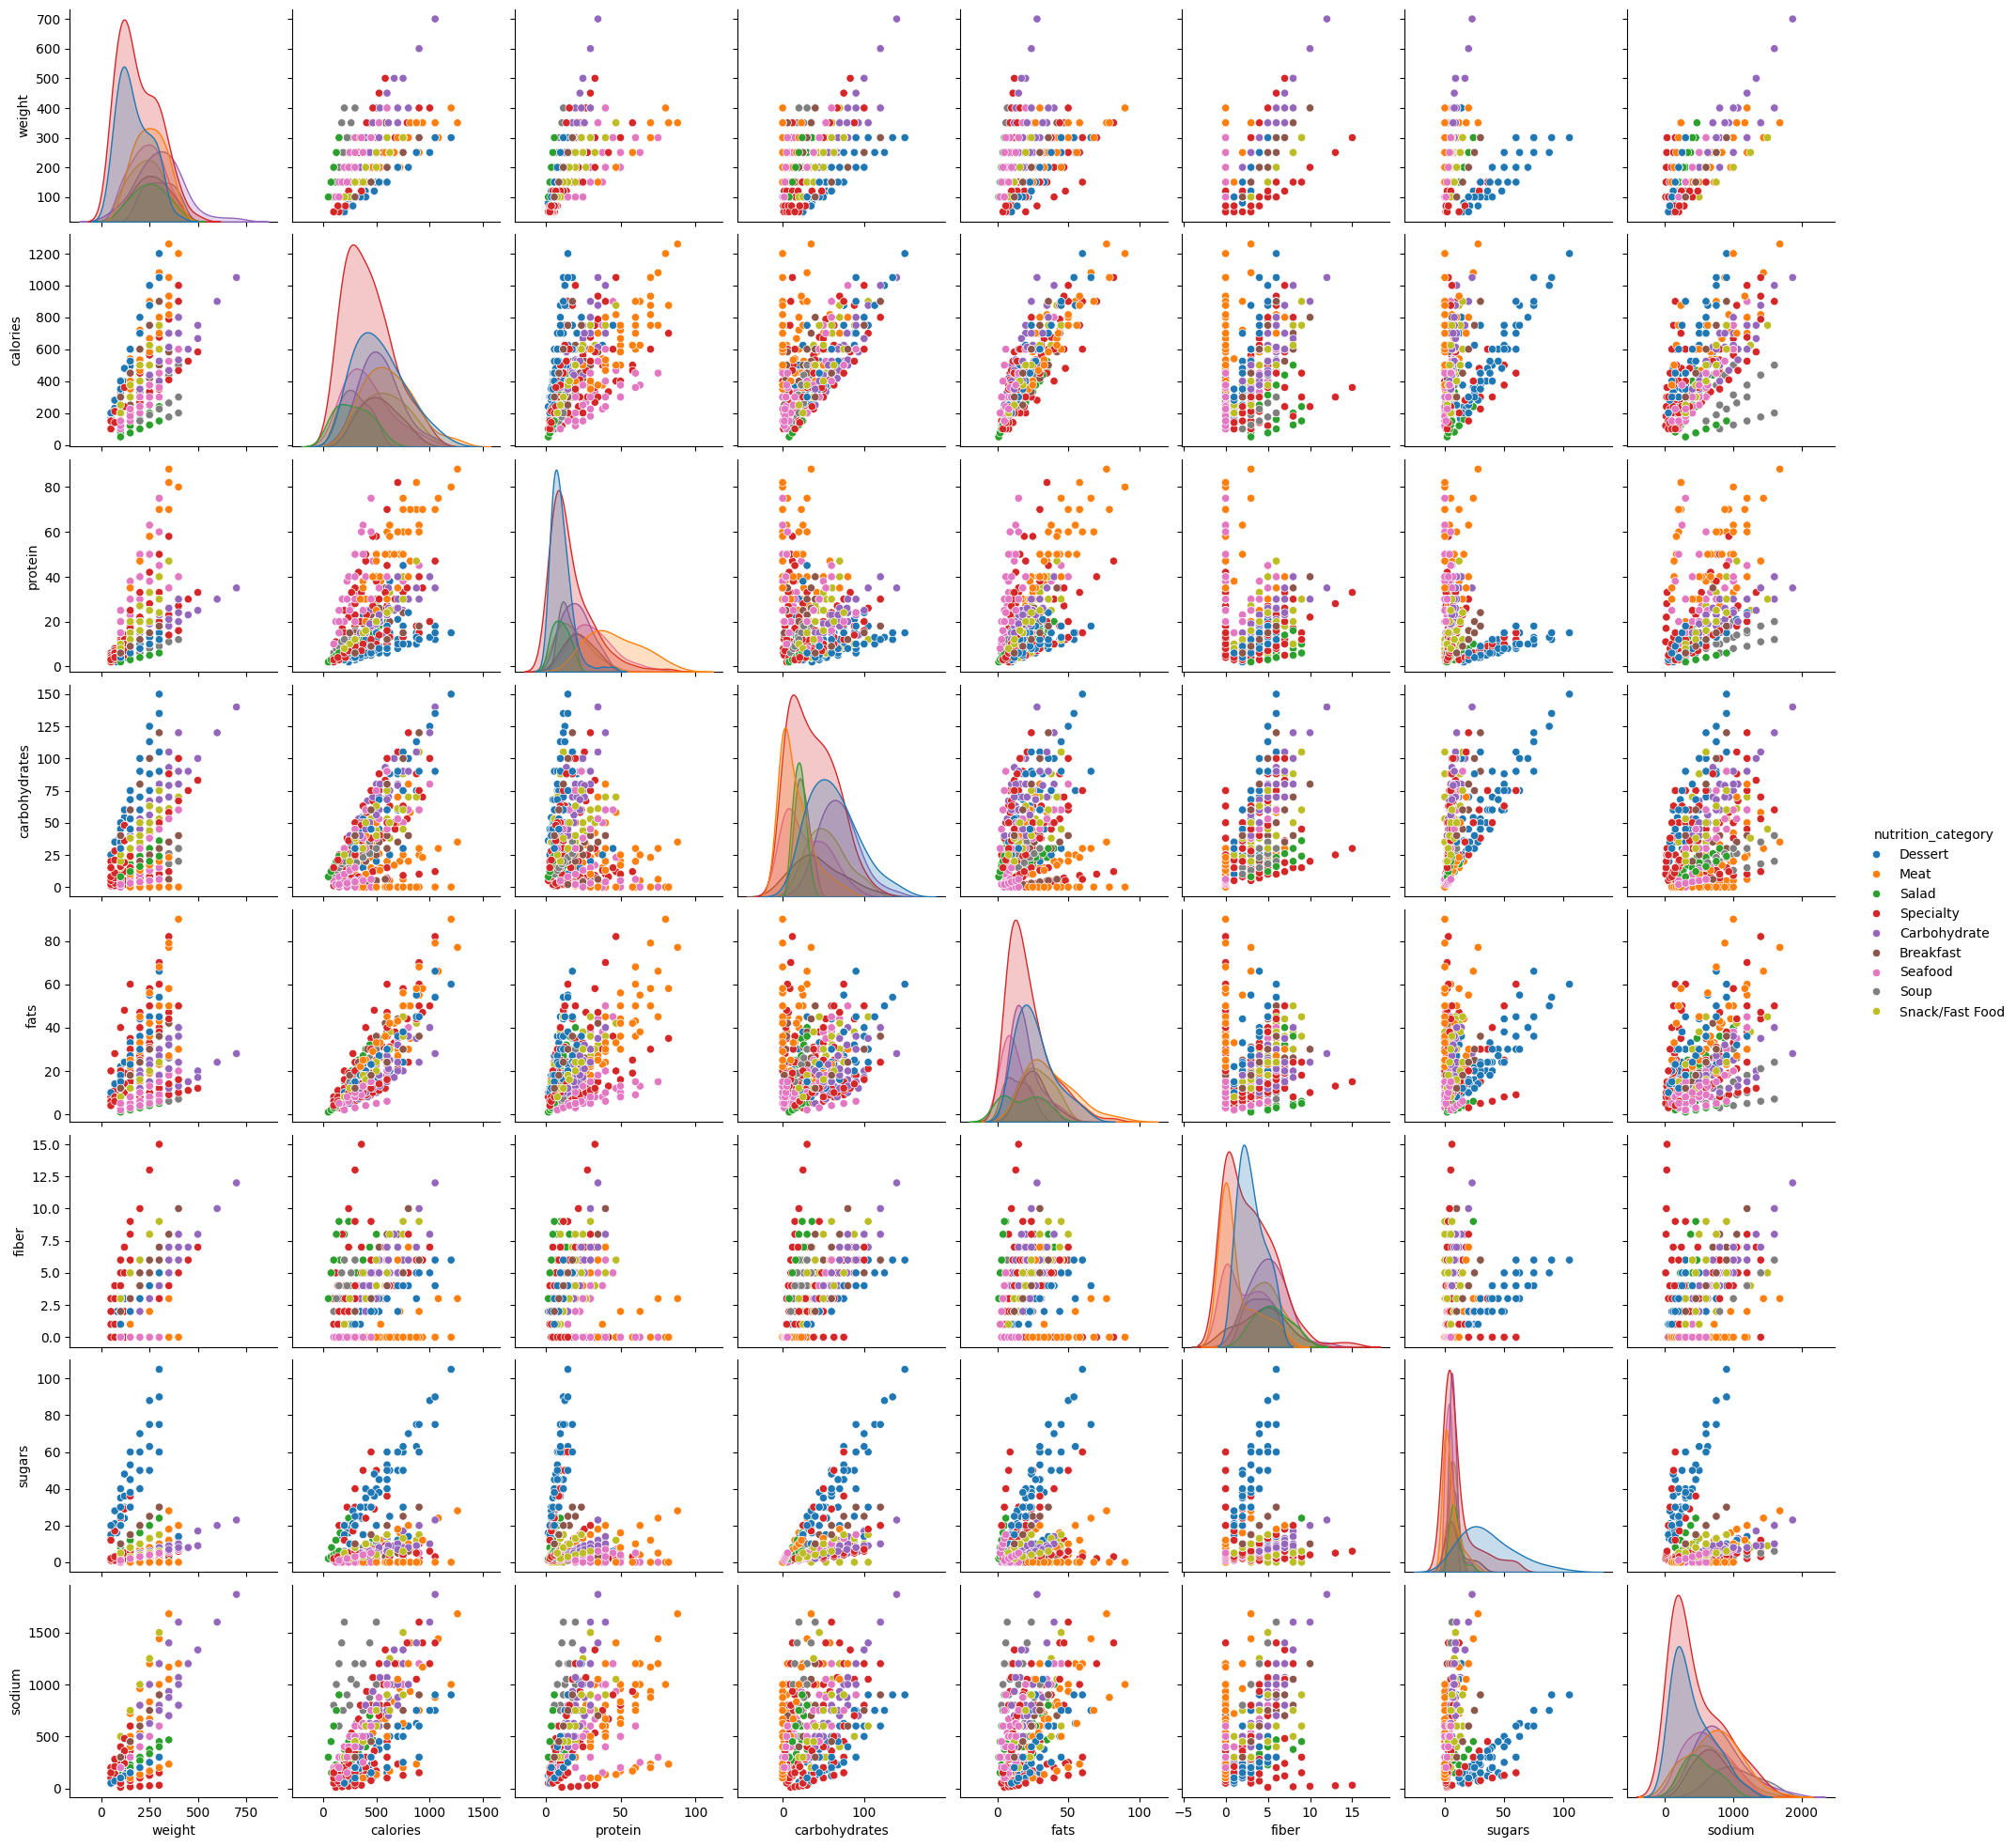

In [10]:
sns.pairplot(data=df, hue="nutrition_category", )

In [11]:
df['nutrition_category'][df['nutrition_category'] == "Specialty"].count()

135

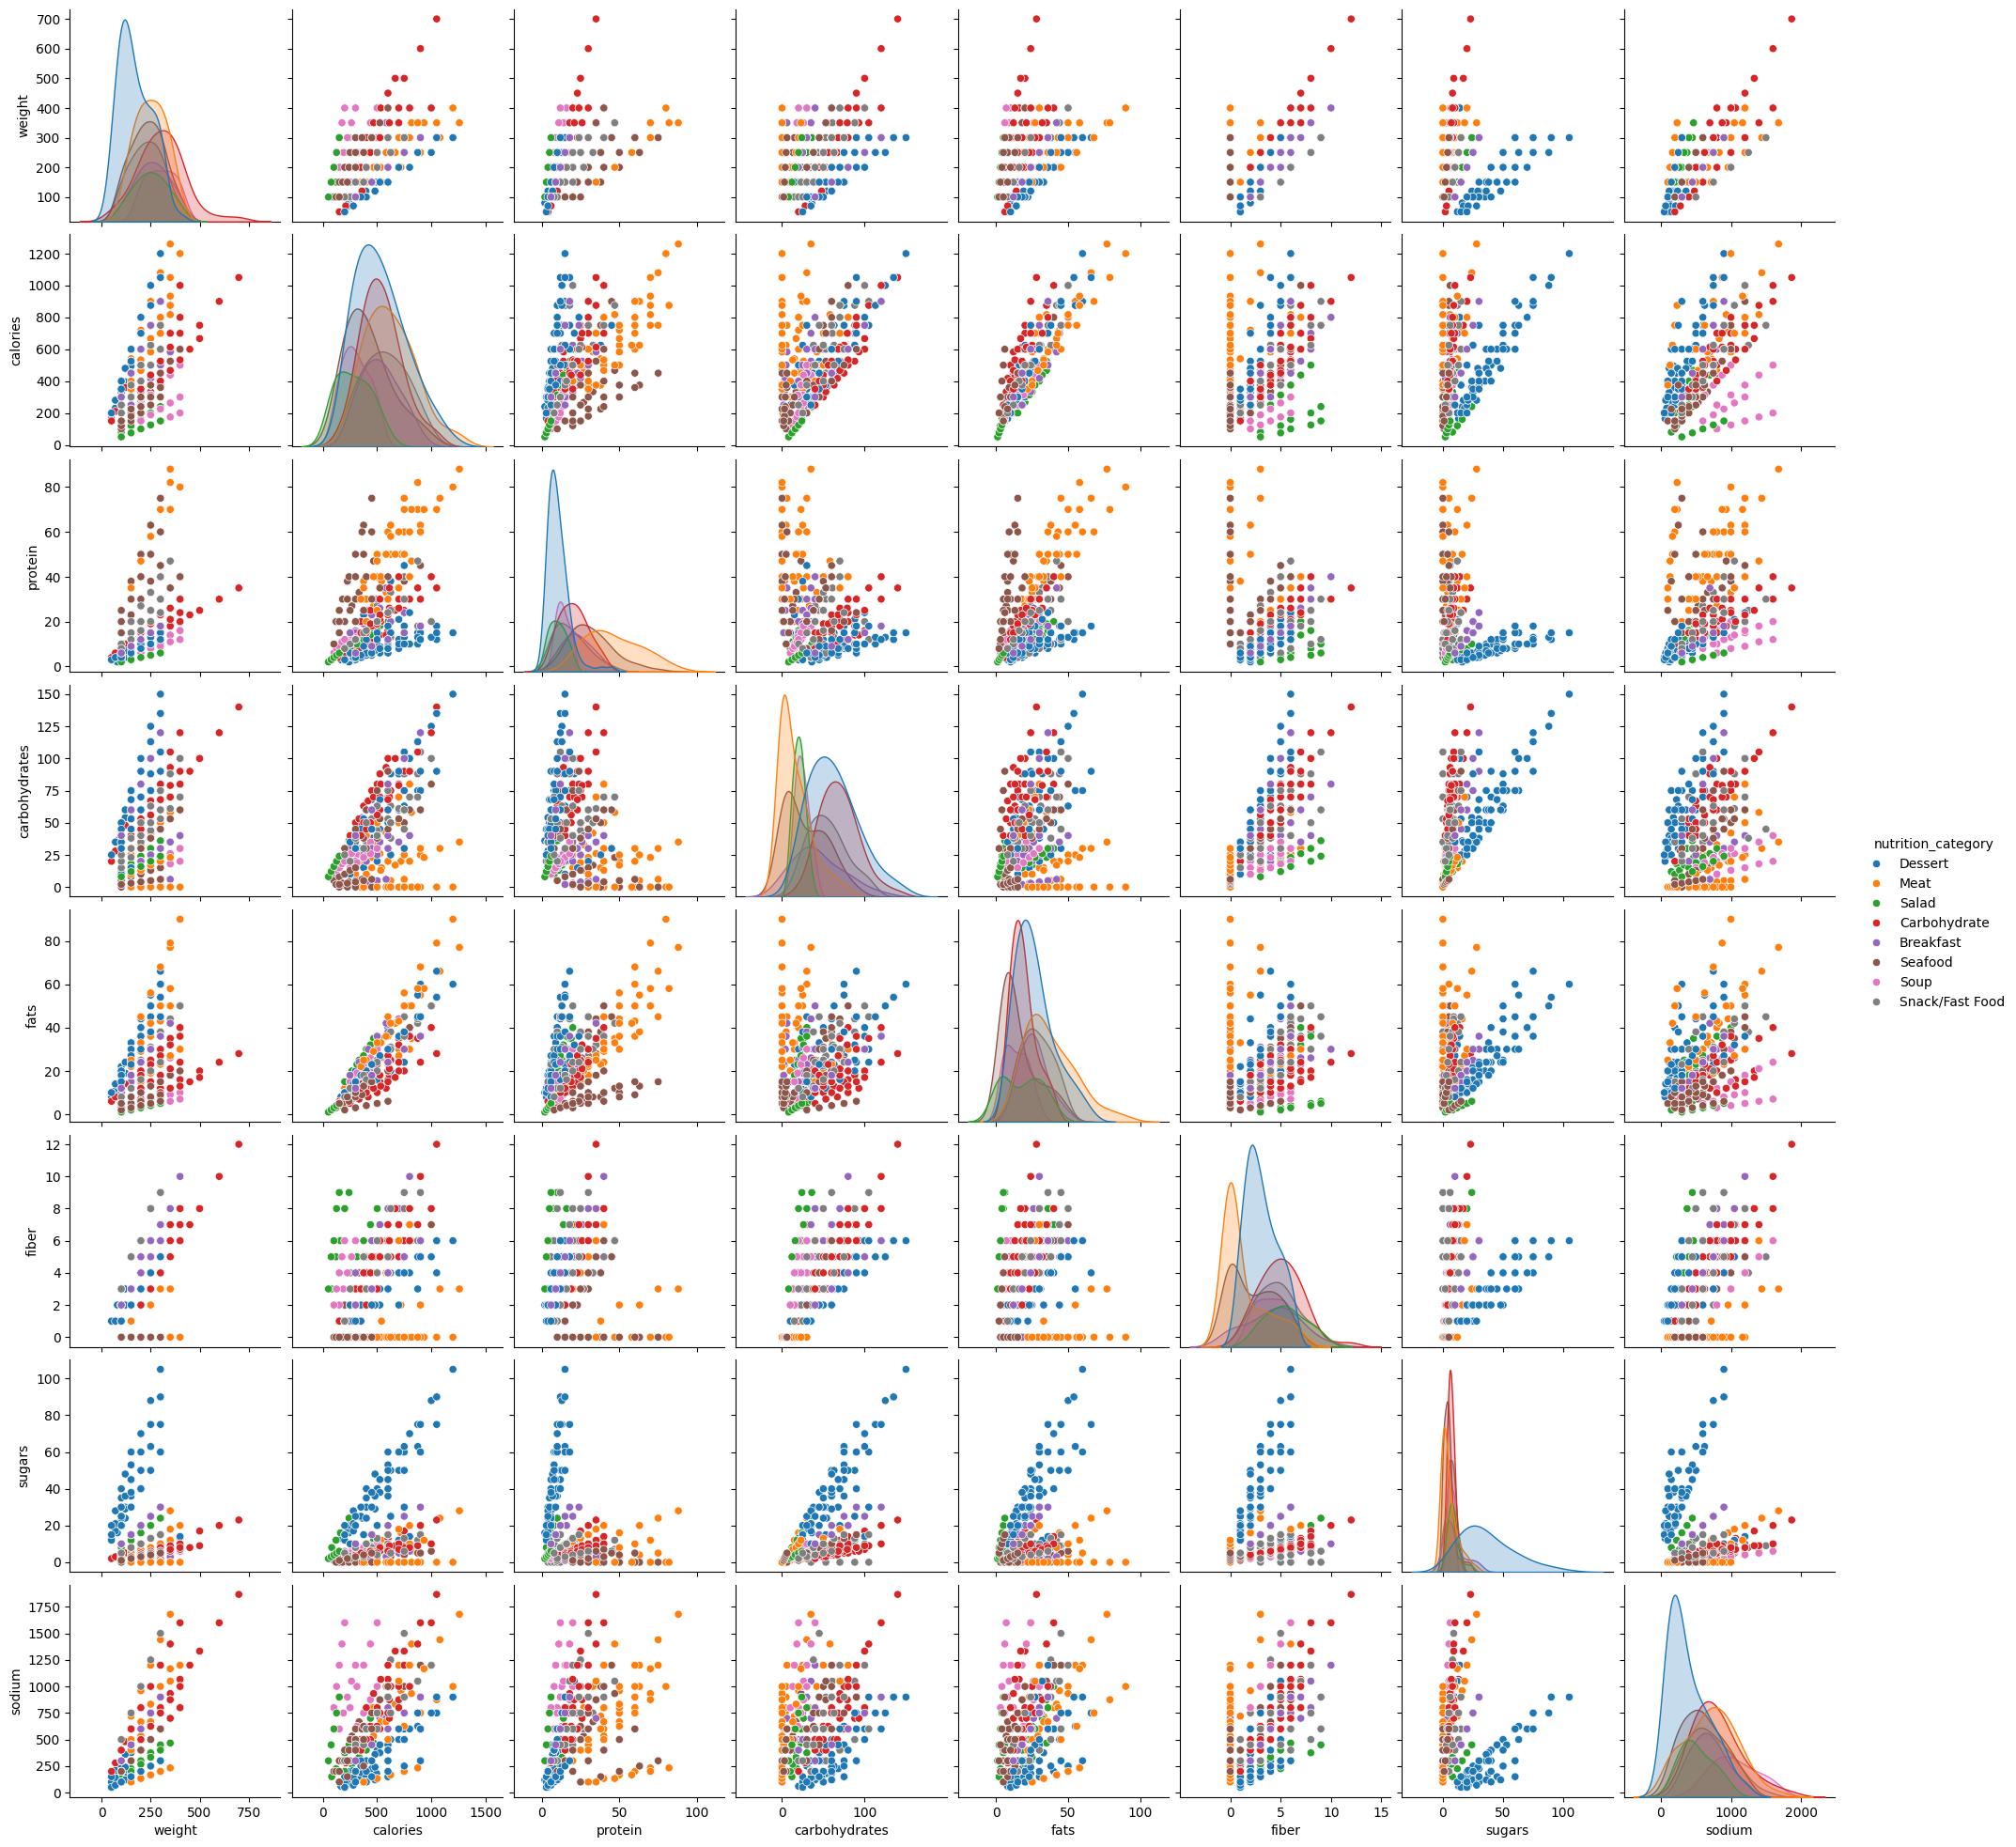

In [12]:
# Filter the DataFrame to exclude 'Specialty' category
filtered_df = df[df['nutrition_category'] != 'Specialty']

# Create the pairplot with the filtered data
sns.pairplot(data=filtered_df, hue="nutrition_category")
plt.show()

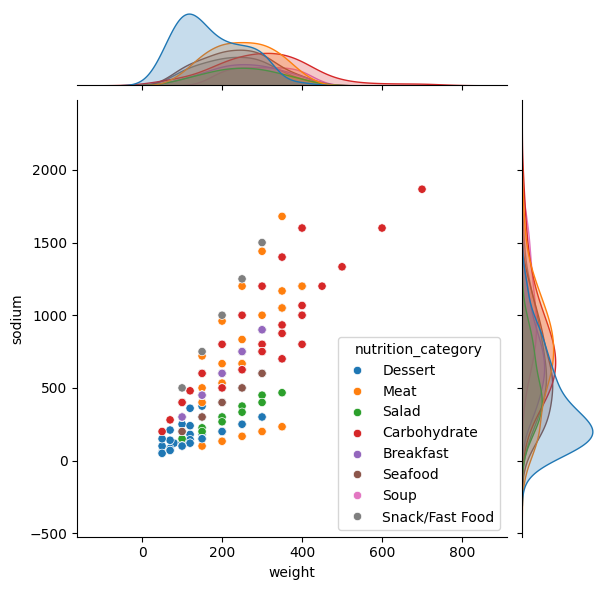

In [13]:
sns.jointplot(data=filtered_df, x="weight", y="sodium", hue="nutrition_category")

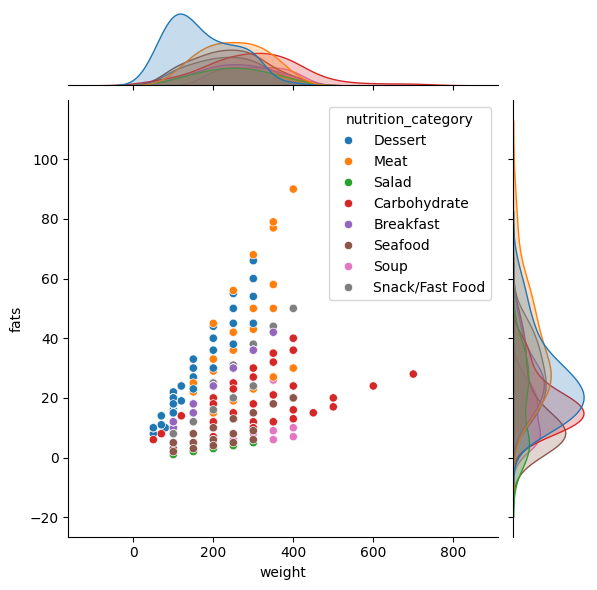

In [14]:
sns.jointplot(data=filtered_df, x="weight", y="fats", hue="nutrition_category")

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.4% of the points cannot be plac

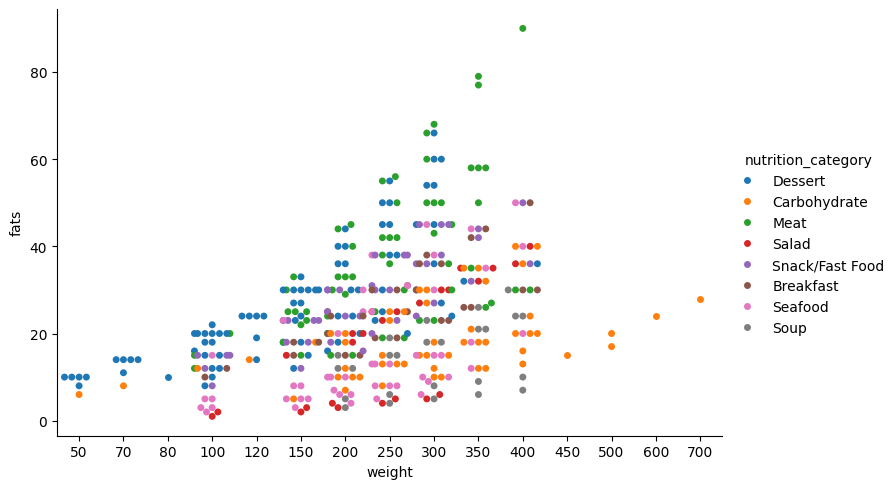

In [15]:
sns.catplot(data=filtered_df, x="weight", y="fats", hue="nutrition_category", kind="swarm", aspect=1.5)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.3% of the points cannot be plac

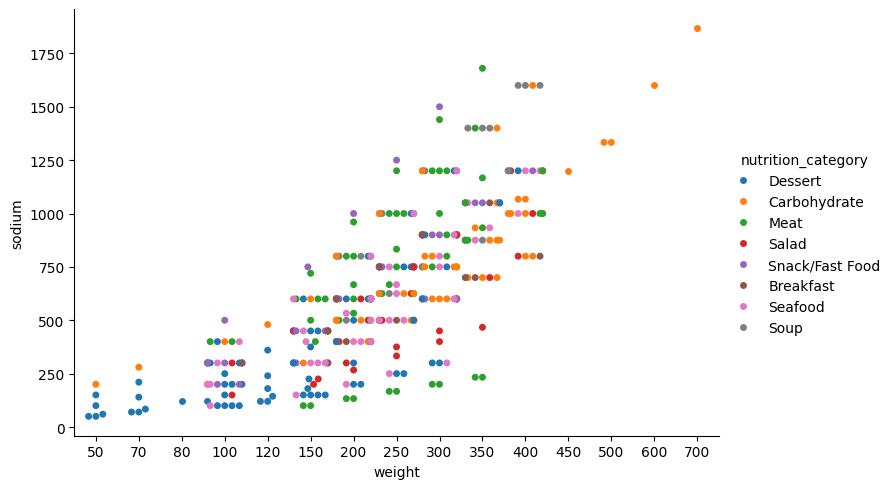

In [16]:
sns.catplot(data=filtered_df, x="weight", y="sodium", hue="nutrition_category", kind="swarm", aspect=1.5)

In [29]:
import plotly.express as px

fig = px.scatter(
    filtered_df,
    x="weight",
    y="sodium",
    color="nutrition_category",
    hover_data=['label'],
    symbol="nutrition_category"
)
fig.show()

In [27]:
fig = px.scatter(
    filtered_df,
    x="weight",
    y="fats",
    color="nutrition_category",
    hover_data=['label'],
    symbol="nutrition_category"
)
fig.show()

In [41]:
sorted_df = filtered_df.sort_values(by=['sodium','weight'], ascending=[False, False])

top_10_sodium = sorted_df.head(10)

display(top_10_sodium)

label  weight  calories  protein  carbohydrates  fats  \
39             bibimbap     700      1050       35            140    28   
9        baby_back_ribs     350      1260       88             35    77   
38             bibimbap     600       900       30            120    24   
124        clam_chowder     400       500       20             40    24   
209   french_onion_soup     400       500       20             40    24   
324           miso_soup     400       200       12             20     7   
384               pizza     400      1000       40            120    40   
279             hot_dog     300       750       30             45    45   
8        baby_back_ribs     300      1080       75             30    66   
99   chicken_quesadilla     350       817       47             58    35   

     fiber  sugars  sodium nutrition_category  
39      12      23    1867       Carbohydrate  
9        3      28    1680               Meat  
38      10      20    1600       Carbohydrate  
124      6      10    1600               Soup  
209      6      10    1600               Soup  
324      6       6    1600               Soup  
384      8      10    1600       Carbohydrate  
279      5       9    1500    Snack/Fast Food  
8        3      24    1440               Meat  
99       6       6    1400               Meat

In [40]:
sorted_df_fat = filtered_df.sort_values(by=['fats','weight'], ascending=[False, False])

top_10_fats = sorted_df_fat.head(10)

display(top_10_fats)

label  weight  calories  protein  carbohydrates  fats  fiber  \
399         prime_rib     400      1200       80              0    90      0   
398         prime_rib     350      1050       70              0    79      0   
9      baby_back_ribs     350      1260       88             35    77      3   
397         prime_rib     300       900       60              0    68      0   
8      baby_back_ribs     300      1080       75             30    66      3   
89         cheesecake     300      1050       18             90    66      4   
104     chicken_wings     300       900       60             30    60      0   
109    chocolate_cake     300      1200       15            150    60      6   
114  chocolate_mousse     300       900       15             75    60      6   
189      filet_mignon     350       875       70              0    58      0   

     sugars  sodium nutrition_category  
399       0    1000               Meat  
398       0     875               Meat  
9        28    1680               Meat  
397       0     750               Meat  
8        24    1440               Meat  
89       75     750            Dessert  
104       5    1200               Meat  
109     105     900            Dessert  
114      60     300            Dessert  
189       0     233               Meat